In [13]:
from matplotlib import pyplot as plt
import numpy as np
import sympy
from sympy.codegen.cfunctions import hypot
from IPython.display import display

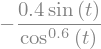

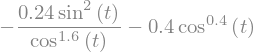

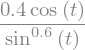

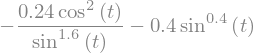

In [16]:
# Вычислим аналитически формулы производных. 
t, a, b, n = sympy.symbols("t, a, b, n")

n = 5
a = 1
b = 1

sympy.init_printing(use_unicode=True)
x_sym = a * sympy.cos(t)**(2/n)
y_sym = a * sympy.sin(t)**(2/n)

diff_x_1 = sympy.diff(x_sym)
diff_x_2 = sympy.diff(diff_x_1)
diff_y_1 = sympy.diff(y_sym)
diff_y_2 = sympy.diff(diff_y_1)

# Выведем красиво производные, чтобы затем записать их в формулы
display(diff_x_1)
display(diff_x_2)
display(diff_y_1)
display(diff_y_2)

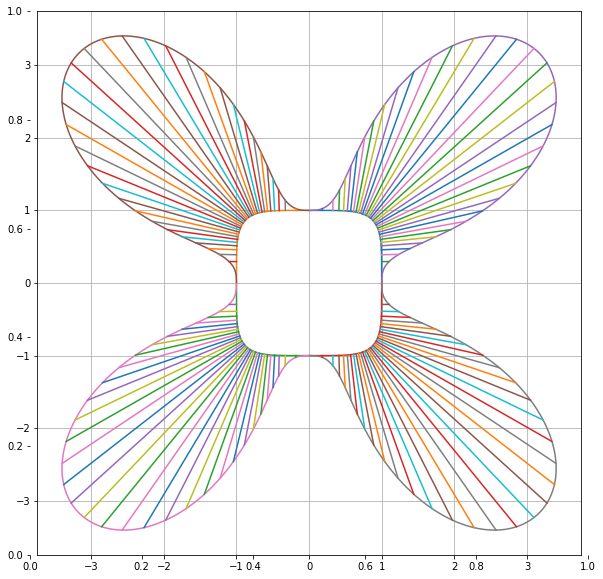

In [129]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(1, 1, 1)
ax.grid()
ax.set_aspect('equal')

# При изменении параметров, необходимо вручную пересчитать производные!
n = 5
a = 1
b = 1

theta = np.linspace(10e-6, np.pi/2-10e-6, 1000)

x = a * np.cos(theta)**(2/n)
y = b * np.sin(theta)**(2/n)

diffx1 = -0.4*np.sin(theta)/np.cos(theta)**(.6)
diffx2 = -0.24*np.sin(theta)**2/np.cos(theta)**(1.6) - 0.4*np.cos(theta)**.4
diffy1 = .4*np.cos(theta)/np.sin(theta)**.6
diffy2 = -.24*np.cos(theta)**2/np.sin(theta)**1.6 - .4*np.sin(theta)**.4

# Кривизна.
curv = ( diffx1*diffy2 - diffx2*diffy1 ) / ( diffx1**2 + diffy1**2 ) ** (3/2)

# Нормированный вектор нормали
x_norm = -diffy1 / np.hypot(diffx1, diffy1)
y_norm = diffx1 / np.hypot(diffx1, diffy1)

# Берём единичный вектор нормали и умножаем его на значение кривизны (кривизна - это скаляр). 
# Смещаем полученный результат на (x,y), чтобы строить кривизну от суперэллипса, а не от (0,0)
x_curv = -curv * x_norm + x
y_curv = -curv * y_norm + y

# Строим графики
ax.plot(x, y)
ax.plot(-x, y)
ax.plot(-x, -y)
ax.plot(x, -y)

ax.plot(x_curv, y_curv)
ax.plot(-x_curv, y_curv)
ax.plot(-x_curv, -y_curv)
ax.plot(x_curv, -y_curv)

# Рисуем линии нормали.
for i in range(0, len(x), 30):
    px = np.array([x[i], x_curv[i]])
    py = np.array([y[i], y_curv[i]])
    ax.plot(px, py)
    ax.plot(-px, py)
    ax.plot(-px, -py)
    ax.plot(px, -py)


In [128]:
# Сохраним изображение
fig.savefig('img12.png', format='png', bbox_inches='tight', pad_inches=0)

# Supplementary:  

### Полезный пример того, как matplotlib принимает точки

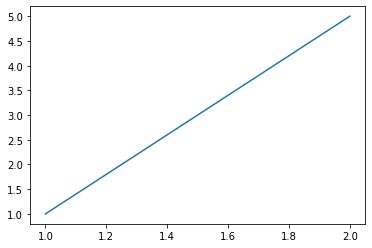

In [130]:
fig02 = plt.figure(num=2)
ax2 = fig02.add_subplot(1,1,1)

ax2.plot([2, 1], [5,1])

### Формула кривизны:





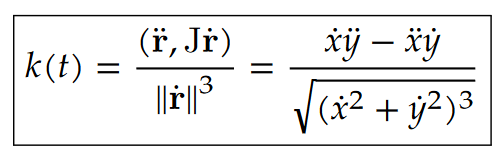

### Формула нормали:  

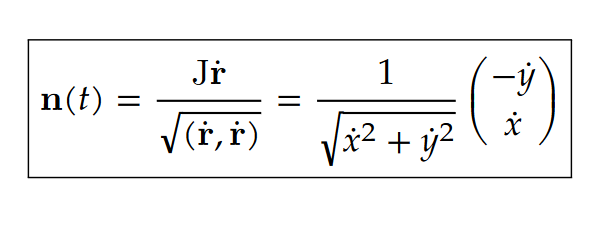